## Collecting Data 
Dataset is from 2 source : 

1.   From IEEE : https://ieee-dataport.org/open-access/fruitsgb-top-indian-fruits-quality
2.   From Kaggle : https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

Link for zip dataset in google drive : https://drive.google.com/file/d/1s0mHiO3wF_shUHO8NwjytBD1svWAFSr_/view?usp=sharing





In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import shutil
import os

source = r'/content/gdrive/MyDrive/dataset.zip'
destination = r'/content/dataset.zip'

In [4]:
shutil.copyfile(source, destination)

'/content/dataset.zip'

In [5]:
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

## Exploratory dataset

In [6]:
path = r'/content/dataset/'
categories= os.listdir(path)
categories

['Banana_Good',
 'Banana_Bad',
 'Apple_Bad',
 'Orange_Bad',
 'Orange_Good',
 'Apple_Good']

In [7]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} folder : {} file ".format(categorie, count_num_file(path,categorie)))
  

Banana_Good folder : 2963 file 
Banana_Bad folder : 3756 file 
Apple_Bad folder : 3954 file 
Orange_Bad folder : 3009 file 
Orange_Good folder : 2869 file 
Apple_Good folder : 3088 file 


In [8]:
#ext=".png"
#os.rename(r'/content/dataset/Apple_Bad',r'/content/dataset/Apple_Bad/IMG_20190824_175205.png')

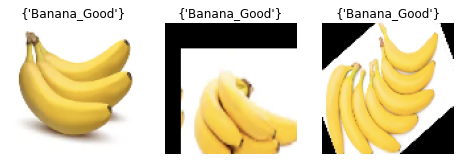

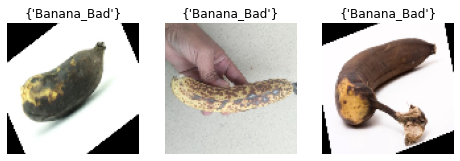

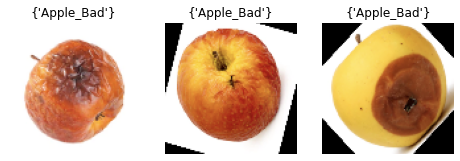

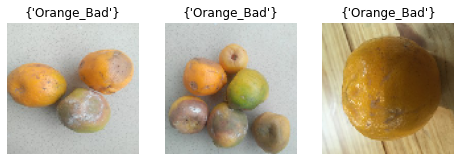

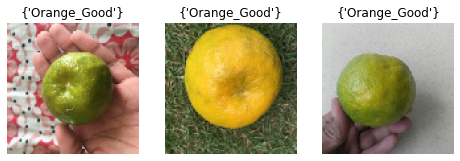

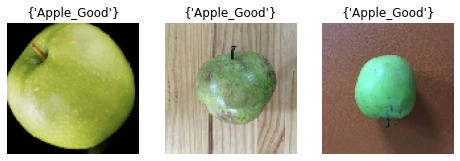

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

# get the list of jpgs from sub image class folders
def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  
  # randomly select 3 of each
  select_img= np.random.choice(img, 3, replace = False)

  # plotting 2 x 3 image matrix
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
    
      # to plot without rescaling, remove target_size
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)


In [10]:
def count_ext(path,categorie):
  count_img = 0
  
  for i in os.listdir(path+categorie):
    ext = os.path.splitext(os.path.basename(f'{path}{categorie}/{i}'))[1]
    if ext == '.jpg':
      count_img +=1
    
  print("{} have {} image with jpg extension".format(categorie,count_img))

for categorie in categories:
  count_ext(path,categorie)

Banana_Good have 1000 image with jpg extension
Banana_Bad have 1000 image with jpg extension
Apple_Bad have 1003 image with jpg extension
Orange_Bad have 1010 image with jpg extension
Orange_Good have 1006 image with jpg extension
Apple_Good have 1000 image with jpg extension


In [11]:
path_train = '/content/dataset_result/train/'
path_val = '/content/dataset_result/val/'

for categorie in categories:
  try:
    os.makedirs(path_train+categorie,exist_ok=True)
    print("Directory {} created successfully".format(path_train+categorie))
  except OSError as error:
    print("Directory {} can not be created".format(path_train+categorie))

for categorie in categories:
  try:
    os.makedirs(path_val+categorie,exist_ok=True)
    print("Directory {} created successfully".format(path_val+categorie))
  except OSError as error:
    print("Directory {} can not be created".format(path_val+categorie))

Directory /content/dataset_result/train/Banana_Good created successfully
Directory /content/dataset_result/train/Banana_Bad created successfully
Directory /content/dataset_result/train/Apple_Bad created successfully
Directory /content/dataset_result/train/Orange_Bad created successfully
Directory /content/dataset_result/train/Orange_Good created successfully
Directory /content/dataset_result/train/Apple_Good created successfully
Directory /content/dataset_result/val/Banana_Good created successfully
Directory /content/dataset_result/val/Banana_Bad created successfully
Directory /content/dataset_result/val/Apple_Bad created successfully
Directory /content/dataset_result/val/Orange_Bad created successfully
Directory /content/dataset_result/val/Orange_Good created successfully
Directory /content/dataset_result/val/Apple_Good created successfully


Move all the kaggle file to train. Split the 

In [12]:
def split_file(path, name_dir):
  src_files= os.listdir(path+name_dir)
  #print(src_files)
  val_size = 0.2*count_num_file(path, name_dir)
  count_val_file = 0

  for file_name in src_files:
      split_ext = os.path.splitext(os.path.basename(f'{file_name}'))

      if split_ext[1] == '.png':
        src = os.path.join(path+name_dir, file_name)
        
        dest = os.path.join(path_train+name_dir, file_name)
     
        shutil.copy(src, dest)

      elif split_ext[1] == '.jpg':
        if count_val_file > val_size :
          src = os.path.join(path+name_dir, file_name)
     
          dest = os.path.join(path_train+name_dir, split_ext[0]+'.png')

          shutil.copy(src, dest)
          #print('succes copy from {} to {}'.format(src,dest))
        else :
          src = os.path.join(path+name_dir, file_name)
          dest = os.path.join(path_val+name_dir, split_ext[0]+'.png')
          shutil.copy(src,dest)
          count_val_file = count_val_file + 1
          #print('succes copy from {} to {}'.format(src,dest))

In [13]:
for categorie in categories:
  split_file(path, categorie)

In [14]:
for categorie in categories:
  print(count_num_file(path_val,categorie))
    

593
752
791
602
574
618


In [15]:
for categorie in categories:
  print(count_num_file(path_train,categorie))
    

2369
3004
3162
2406
2294
2470


Optional 

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    fill_mode = 'nearest')


In [17]:
train_generator = train_datagen.flow_from_directory(
        path_train,  
        target_size=(100, 100),
        batch_size= 32,
        class_mode='categorical')
val_generator = train_datagen.flow_from_directory(
        path_val,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

Found 15705 images belonging to 6 classes.
Found 3930 images belonging to 6 classes.


In [18]:
train_generator.class_indices

{'Apple_Bad': 0,
 'Apple_Good': 1,
 'Banana_Bad': 2,
 'Banana_Good': 3,
 'Orange_Bad': 4,
 'Orange_Good': 5}

In [19]:
val_generator.class_indices

{'Apple_Bad': 0,
 'Apple_Good': 1,
 'Banana_Bad': 2,
 'Banana_Good': 3,
 'Orange_Bad': 4,
 'Orange_Good': 5}

In [20]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    
    #add neural network
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(6, activation='softmax')
])

In [21]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [22]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99 and logs.get('val_accuracy')>0.99):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 99!")
callbacks = myCallback()

In [23]:
from keras import callbacks
from keras.callbacks import ModelCheckpoint
earlystop = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 20, 
                                        restore_best_weights = True)

In [24]:
modelcheck = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [25]:
history=model.fit(
      train_generator,
      steps_per_epoch=50, 
      epochs=100,
      validation_data=val_generator, 
      validation_steps=20, 
      callbacks=[earlystop, modelcheck],
      verbose=1)

Epoch 1/100
50/50 [==============================] - 42s 205ms/step - loss: 1.5865 - accuracy: 0.3719 - val_loss: 1.9757 - val_accuracy: 0.2344

Epoch 00001: val_accuracy improved from -inf to 0.23438, saving model to best_model.h5
Epoch 2/100
50/50 [==============================] - 10s 203ms/step - loss: 1.0441 - accuracy: 0.5900 - val_loss: 1.4081 - val_accuracy: 0.4828

Epoch 00002: val_accuracy improved from 0.23438 to 0.48281, saving model to best_model.h5
Epoch 3/100
50/50 [==============================] - 10s 206ms/step - loss: 0.7611 - accuracy: 0.7219 - val_loss: 1.3619 - val_accuracy: 0.4469

Epoch 00003: val_accuracy did not improve from 0.48281
Epoch 4/100
50/50 [==============================] - 10s 204ms/step - loss: 0.6330 - accuracy: 0.7588 - val_loss: 1.0118 - val_accuracy: 0.6250

Epoch 00004: val_accuracy improved from 0.48281 to 0.62500, saving model to best_model.h5
Epoch 5/100
50/50 [==============================] - 10s 204ms/step - loss: 0.5225 - accuracy: 0.8

In [26]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

123/123 [==============================] - 12s 97ms/step - loss: 0.1403 - accuracy: 0.9578
Accuracy train:  0.9854823350906372
Accuracy test:  0.9577608108520508


In [32]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

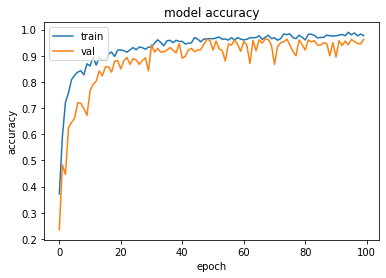

In [28]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

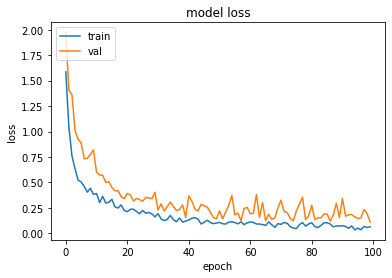

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Saving image5.jpg to image5 (1).jpg
[[0. 0. 0. 0. 1. 0.]]
Orange Bad


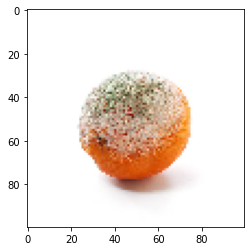

In [44]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size= 32)
  hasil = np.argmax(classes)

  print(classes)

  if classes[0,0] == 1.0:
    print('Apple Bad')
  elif classes[0,1] == 1.0:
    print('Apple Good')
  elif classes[0,2] == 1.0:
    print('Banana_Bad')
  elif classes[0,3] == 1.0:
    print('Banana Good')
  elif classes[0,4] == 1.0:
    print('Orange Bad')
  else:
    print('Orange Good')


**Save Model**

In [45]:
import tempfile
MODEL_DIR = tempfile.gettempdir()

version = 1

export_path = os.path.join(MODEL_DIR, str(version))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

model.save(export_path, save_format="tf")

print('\nexport_path = {}'.format(export_path))
!ls -l {export_path}


Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /tmp/1/assets

export_path = /tmp/1
total 220
drwxr-xr-x 2 root root   4096 Jun  1 18:03 assets
-rw-r--r-- 1 root root  20264 Jun  1 18:03 keras_metadata.pb
-rw-r--r-- 1 root root 196414 Jun  1 18:03 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  1 18:03 variables


In [46]:
# Intialize the TFLite converter to load the SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model(export_path)

# Set the optimization strategy for 'size' in the converter 
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

# Use the tool to finally convert the model
tflite_model = converter.convert()

# Write TFLite model
tflite_model_file = 'Fruit Quality Detection.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

with open('Fruit Quality Detection.txt', 'w') as f:
    f.write('\n'.join(categories))

**Download**

In [47]:
try:
    files.download('Fruit Quality Detection.tflite')
    files.download('Fruit Quality Detection.txt')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
# Save the trained model as a Keras HDF5 file. 

saved_model_path = "./Fruit Quality Detection.h5"

model.save(saved_model_path)